# 라이브러리 불러오기

In [1]:
import sys, os
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import cm, colors

# 디렉토리 변경 및 데이터 불러오기

In [2]:
os.chdir('C:/Users/hjm01/Desktop/겨울방학/alfven')

csv_list = ['helios1_1975.csv','helios1_1976.csv','helios1_1977.csv']

for i in csv_list:
    Data_helios = pd.read_csv(i,index_col='Time',parse_dates=True)
    try:
        Data = pd.concat([Data,Data_helios])
    except NameError:
        Data = Data_helios
        print("Data 변수 할당")

Data 변수 할당


# 필요한 변수 지정

In [3]:
Data['ex_t'] = (1.5*10**8)*Data['r_sun']/Data['v']

k = 1.38*10**(-16);e = 4.8*10**(-10); m = 1.67*10**(-24) # CGS 단위
Data['logarithm'] = np.log((3*np.sqrt(k*Data['T'])**3)/(2*e**3*np.sqrt(Data['n_p']*np.pi)))

up = 4*np.sqrt(np.pi)*e**4*Data['n_p']*Data['logarithm']
down = 3*np.sqrt(m)*np.sqrt(k*Data['T'])**3

Data['chandran_fre'] = up/down

Data['c_n'] = Data['ex_t']*Data['chandran_fre']

k = 8.617*10**(-5) # SI 단위
Data['entro'] = (k*Data['T'])/Data['n_p']**(2/3)

# 조사한 기간 설정 (미리 지정) 및 type에 따라 분류

In [4]:
list_list = ['minimum/h1_1975.csv','minimum/h1_1976.csv','minimum/h1_1977.csv']

for j in list_list:
    Data_list = pd.read_csv(j,index_col=0)
    Data_list.columns = [['start','start','start','end','end','end','type'],['day','hour','min','day','hour','min','type']]
    Data_list['year'] = j[11:15]
    try:
        time_list = pd.concat([time_list,Data_list.drop(Data_list.index[0])])
    except NameError:
        time_list = Data_list.drop(Data_list.index[0])
        print("list 변수 할당")

list_A = time_list[time_list['type']['type'] == 'a'][['start','end','year']].astype(int)
list_B = time_list[time_list['type']['type'] == 'b'][['start','end','year']].astype(int)
list_C = time_list[time_list['type']['type'] == 'c'][['start','end','year']].astype(int)

list 변수 할당


# 위를 기반으로 데이터 프레임 재생성

In [5]:
idx = 0
for lst in [list_A,list_B,list_C]:
    for year in sorted(set(lst['year'])):
        stream = lst[lst['year'] == year][['start','end']]
        for row in range(stream.shape[0]):
            start_time = datetime(year,int(stream.index[row]),stream['start']['day'][row],stream['start']['hour'][row],stream['start']['min'][row],0)
            end_time = datetime(year,int(stream.index[row]),stream['end']['day'][row],stream['end']['hour'][row],stream['end']['min'][row],0)

            try:
                globals()['Data{}'.format(idx+1)] = pd.concat([globals()['Data{}'.format(idx+1)],Data[start_time:end_time]])
            except KeyError:
                globals()['Data{}'.format(idx+1)] = Data[start_time:end_time]
    idx += 1

# 분류된 데이터의 트렌드 파악 및 그래프

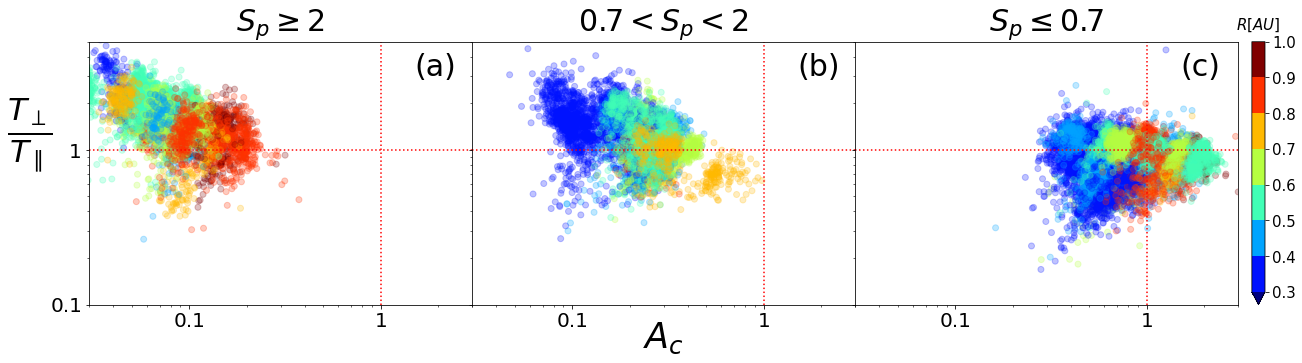

In [6]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

bounds = [.3,.4,.5,.6,.7,.8,.9,1]
cmap=plt.get_cmap('jet', 8)
jet_colors = list(cmap(np.arange(8)))
cmap = colors.ListedColormap(jet_colors[1:], "")
cmap.set_under(jet_colors[0])

text_list = {0:["(a)",r"$S_{p}\geq2$"],1:["(b)",r"$0.7<S_{p}<2$"],2:["(c)",r"$S_{p}\leq0.7$"]}

for num,dt in enumerate([Data2,Data1,Data3]):
    scat=ax[num].scatter(dt['c_n'],dt['A'],c=dt['r_sun'],alpha=0.25,cmap=cmap,vmin=0.3,vmax=1)
    ax[num].axvline(1,color='red',linestyle=':');ax[num].axhline(1,color='red',linestyle=':')
    ax[num].set_xlim(0.03,3);ax[num].set_ylim(0.1,5)
    ax[num].set_xscale('log');ax[num].set_yscale('log')
    ax[num].set_xticks([0.1,1],['0.1','1'],fontsize=20)

    ax[num].text(1.5,3,text_list[num][0],fontsize=30)
    ax[num].set_title(text_list[num][1],fontsize=30)

    if num == 0:
        ax[num].set_ylabel(r"$\frac{T_{\perp}}{T_{\parallel}}$",y=0.5,fontsize=45,rotation=0,labelpad=20)
        ax[num].set_yticks([0.1,1],['0.1','1'],fontsize=20)
    else:
        plt.setp(ax[num].get_yticklabels(),visible=False)

ax[1].set_xlabel(r"$A_c$",fontsize=35,labelpad=-10)

plt.subplots_adjust(left=0.1,right=1.05,bottom=0.15,wspace=0)

color_bar = fig.colorbar(scat,extend='min', spacing='proportional', ticks=bounds,ax=ax.ravel().tolist(),pad=0.01)
color_bar.ax.set_title(r"$R[AU]$",fontsize=15,y=1.025)
color_bar.ax.tick_params(labelsize=15)
color_bar.set_alpha(1)
color_bar.draw_all()

plt.show()